<a href="https://colab.research.google.com/github/ibrahimshehin2017-sketch/WEBSITE-/blob/main/SUPPORT%20VECTOR%20MACHINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
iris = load_iris()
x = iris.data
y = iris.target
model = SVC (kernel='linear')
cv_scores = cross_val_score(model,x,y,cv=5)
print ("cross-validation scores:",cv_scores)
print ("mean CV score:",cv_scores.mean())


cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
mean CV score: 0.9800000000000001


Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[16  0]
 [ 0 14]]


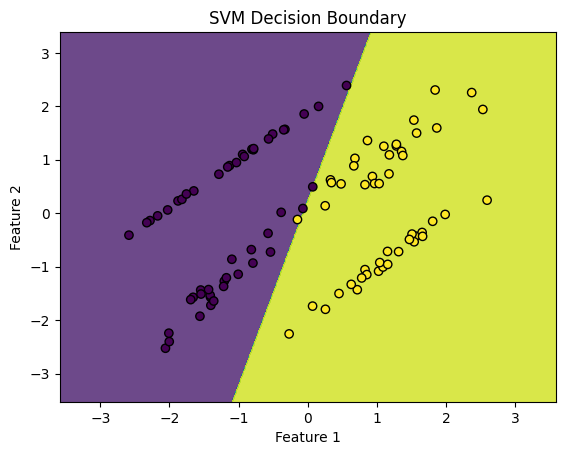

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

make_classification
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt
import numpy as np
# Plotting decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
plot_decision_boundary(X, y, model)


In [9]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
iris = load_iris()
X = iris.data
y = iris.target
model = SVC(kernel='linear')
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean CV Score: 0.9800000000000001


In [11]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
iris = load_iris()
X = iris.data
y_binary = (iris.target != 0).astype(int) # Binary classification: Class 0 vs others
y_multi = iris.target # Multi-class classification
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.3, random_state=42)
_, _, y_train_multi, y_test_multi = train_test_split(X, y_multi, test_size=0.3, random_state=42)
model_binary = SVC(kernel='linear', probability=True)
model_binary.fit(X_train, y_train_binary)
y_pred_binary = model_binary.predict(X_test)
y_prob_binary = model_binary.predict_proba(X_test)[:, 1]
print("Classification Report (Binary):\n", classification_report(y_test_binary, y_pred_binary))
roc_auc = roc_auc_score(y_test_binary, y_prob_binary)
print("ROC-AUC Score (Binary):", roc_auc)
model_multi = SVC(kernel='linear', probability=True)
model_multi.fit(X_train, y_train_multi)
y_pred_multi = model_multi.predict(X_test)
print("\nClassification Report (Multi-Class):\n", classification_report(y_test_multi, y_pred_multi))

Classification Report (Binary):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

ROC-AUC Score (Binary): 1.0

Classification Report (Multi-Class):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Accuracy with RBF Kernel: 0.9666666666666667


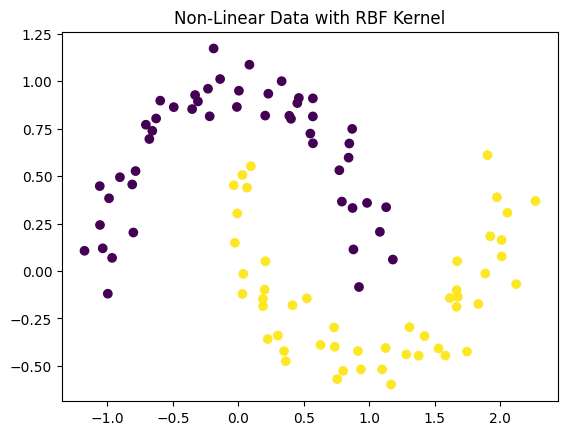

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC(kernel='rbf', C=1, gamma=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with RBF Kernel:", accuracy)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Non-Linear Data with RBF Kernel")
plt.show()


In [13]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
iris = load_iris()
X = iris.data
y = iris.target
param_grid = {
'C': [0.1, 1, 10],
'gamma': [1, 0.1, 0.01],
'kernel': ['linear', 'rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X, y)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best Score: 0.9800000000000001
